# Homework 1 

This notebook uses the Kaggle Chest X-Ray Images (Pneumonia) Dataset, which is a collection of 5,863 images in two different categories: normal and pneumonia. I selected this dataset because without a medical background is hard to distinguish between a normal chest x-ray and one with pneumonia, thus this is a perfect use case of Deep Learning.

Dataset:https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Keras Libraries
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from IPython.display import SVG
from keras.utils import model_to_dot
np.random.seed(1671) # for reproducibility”

Using TensorFlow backend.


In [2]:
# See Test Data Categories (using os)
print(os.listdir("C:/Users/artur/Downloads/chest-xray-pneumonia/chest_xray/test"))

['NORMAL', 'PNEUMONIA']


Let's first take a look at how the data looks like.

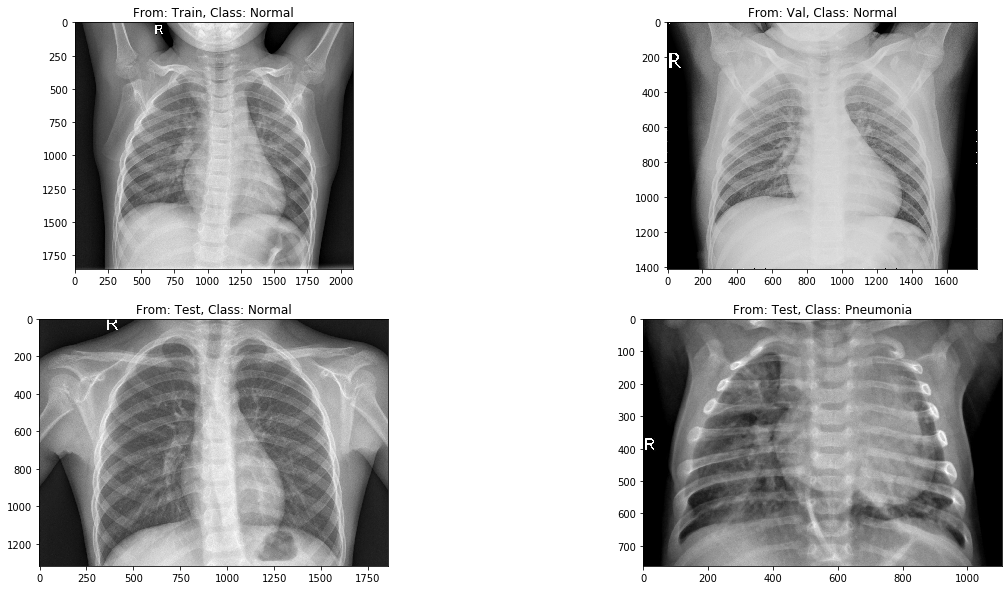

In [3]:
# Plot 4 Images from the Train, Test, and Valuation (Val) Data

fig, a = plt.subplots(2, 2, figsize=(20, 10))
a = a.ravel() # Flatten Axes 1-D
input_path = 'C:/Users/artur/Downloads/chest-xray-pneumonia/chest_xray/'
# Go through folders and plot images
for i, _set in enumerate(['Train', 'Val', 'Test']):
    set_name = input_path+_set # Path name
    a[i].imshow(plt.imread(set_name+'/NORMAL/'+os.listdir(set_name+'/NORMAL')[0]), cmap='gray') # Show Image
    a[i+1].imshow(plt.imread(set_name+'/PNEUMONIA/'+os.listdir(set_name+'/PNEUMONIA')[0]), cmap='gray') # Show Image
    a[i].set_title('From: {}, Class: Normal'.format(_set)) # Title Name
    a[i+1].set_title('From: {}, Class: Pneumonia'.format(_set)) # Title Name

Image Preprocessing, using Image Data Generator

In [4]:
batch_size = 32

# Data Generation Objects to use fit_generator
train_generator = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_generator = ImageDataGenerator(rescale = 1./255)
# Training and Test Sets from Dataset
train_XY = train_generator.flow_from_directory('C:/Users/artur/Downloads/chest-xray-pneumonia/chest_xray/train', target_size = (64, 64), batch_size = batch_size, class_mode = 'binary', shuffle = True)
test_XY = test_generator.flow_from_directory('C:/Users/artur/Downloads/chest-xray-pneumonia/chest_xray/train',   target_size = (64, 64), batch_size = batch_size, class_mode = 'binary', shuffle = True)

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


# Model

The data set are images, thus will use a CNN (Conv Layer --> Activation (ReLu) --> Pooling --> Flatten --> Dense --> Activation (ReLu) --> Dense -> Activation (SoftMax)).

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)             

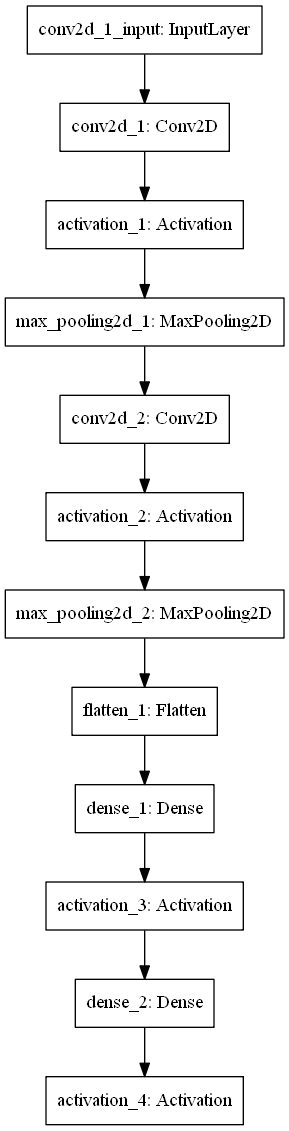

In [5]:
# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(1))
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))
#model.add(Activation("softmax"))
# Compile Model
model.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = Adamax(), metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = Nadam(), metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = Adadelta(), metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = Adagrad(), metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

model.summary()
plot_model(model, to_file='model.png') # if not working on Windows use: conda install python-graphviz
#SVG(model_to_dot(model).create(prog='dot', format='svg')) #bigger plot

# Training

In [6]:
# Train datset using fit_generator
# Information on fit_generator: https://keras.io/models/sequential/
history = model.fit_generator(train_XY, steps_per_epoch  = 100, epochs = 1, validation_data = test_XY, validation_steps = 50)
score = model.evaluate_generator(test_XY, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])
model.save('CNN.h5')

Epoch 1/1
163/163 [==============================] - 59s 359ms/step
Test score: 0.1789926439523697
Test accuracy: 0.943443238735199


# Training Plots

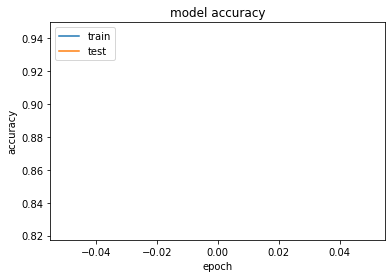

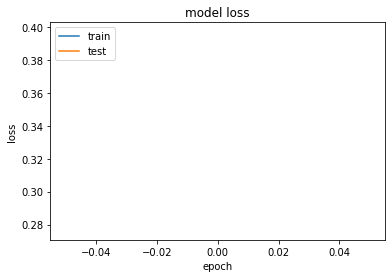

In [7]:
# Plots

# Accuracy Plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Plots
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Remarks

After several iterations with different epochs, validation steps, and steps per epoch I realized that small changes didn't really improve the accuracy significantly. Using 100 or 1000 samples didn't quite change the accuracy; same with validation steps. Using a SoftMax as my last activation layer I would get 74.29% with most combinations of epochs, validations steps, and steps per epoch (under 40 min.) However, I got an accuracy of 90.14% when using 10 epochs for 8000 samples and 2000 validation steps but it took over three hours to finish the training. 

I tested different optimizers and got silightly better results using Adam and Nadam, but the accuracy changes where minimal.

When changing the size of the Dense layer from 500 to 128 I still got the same results, I also tried 250 but the accuracy values were the same. 

When changing the SoftMax activation layer to Sigmoid I got a difference of 15.51%, which I was not expecting, for some reason the Sigmoid activation layer did way better than the Softmax. Also, for some reason when using ReLu, the training didn't work. I didn't have time to test the Sigmoid when using 10 epochs for 8000 samples and 2000 validation steps, but I would assume that the maximum accuracy of 90.14% would improve based on the results when using 5 epochs, 1000 steps and 200 validation steps.